<a href="https://colab.research.google.com/github/AishlyManglani/Data-Mining-Assignments/blob/main/pycaret%20low%20code%20tasks/association_rule_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [8]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


In [9]:
# Load the dataset
data = pd.read_csv('/content/Market_Basket_Optimisation.csv', header=None)

In [11]:
# Create a list of transactions
transactions = data.apply(lambda row: [item for item in row if str(item) != 'nan'], axis=1)

# Perform one-hot encoding
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the association rules
print(rules.head())


       antecedents      consequents  antecedent support  consequent support  \
0        (avocado)  (mineral water)            0.033329            0.238368   
1  (mineral water)        (avocado)            0.238368            0.033329   
2           (cake)        (burgers)            0.081056            0.087188   
3        (burgers)           (cake)            0.087188            0.081056   
4      (chocolate)        (burgers)            0.163845            0.087188   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.011598    0.348000  1.459926  0.003654    1.168147       0.325896  
1  0.011598    0.048658  1.459926  0.003654    1.016113       0.413630  
2  0.011465    0.141447  1.622319  0.004398    1.063198       0.417434  
3  0.011465    0.131498  1.622319  0.004398    1.058080       0.420238  
4  0.017064    0.104150  1.194537  0.002779    1.018933       0.194767  


In [12]:
# Save the rules to a CSV file
rules.to_csv('association_rules.csv', index=False)

<Axes: >

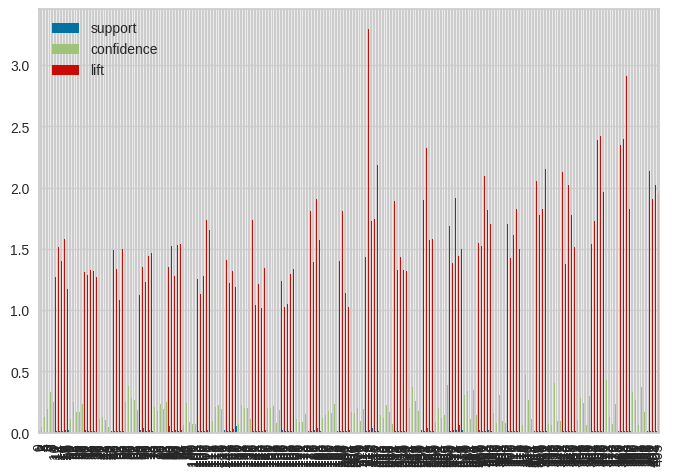

In [13]:
# Optional: Visualize the rules (support, confidence, lift)
rules[['support', 'confidence', 'lift']].plot(kind='bar')